# Web Scraping for Reddit & Predicting Comments

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

### IMPORT ALL LIBRARIES HERE

In [73]:
# IMPORT ALL LIBRARIES HERE

import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
from selenium import webdriver
import re
from selenium.webdriver.common.keys import Keys
from uuid import uuid4 as uuid
from datetime import datetime 

# H/T ALEX HOLT FOR UUID

### DEFINE OUR MAIN REDDIT SOUPER FUNCTION HERE!

In [2]:
def reddit_secrets(URL):
    reddit_request = requests.get(URL, headers={"User-agent": str(uuid())}) # H/T ALEX HOLT FOR UUID
    soup = BeautifulSoup(reddit_request.text, "lxml")
#     print(soup.prettify())
    return soup


#     driver = webdriver.Chrome(executable_path="/Users/AndyKashyap/Downloads/chromedriver")
#     driver.get(URL)
#     driver.title
#     assert "reddit:" in driver.title

### NEXT WE DEFINE OUR REDDIT USER SOUPER FUNCTION HERE!

In [3]:
def user_secrets(URL_USER):
    user_request = requests.get(URL_USER, headers={"User-agent": str(uuid())}) # H/T ALEX HOLT FOR UUID
    user_soup = BeautifulSoup(user_request.text, "lxml")
    return user_soup

In [4]:
def subreddit_secrets(URL_SUBREDDIT):
    subreddit_request = requests.get(URL_SUBREDDIT, headers={"User-agent": str(uuid())}) # H/T ALEX HOLT FOR UUID
    subreddit_soup = BeautifulSoup(subreddit_request.text, "lxml")
    return subreddit_soup

### DEFINE REDDIT SCRAPER HERE. 

In [5]:
def reddit_scraper(soup,index_count):

    for posts in soup.find_all('div', {'data-context':'listing'}):
        
        count = len(post_title)

        """DOCSTRING: START PULLING STUFF FROM REDDIT.""" 

        # POST_TITLE
        try:
            post_title.append(posts.find('a', {"data-event-action" : "title"}).text)
        except:
            pass 


        # SUBREDDIT
        try:
            post_subreddit.append(posts.find('a', {"class" : "subreddit hover may-blank"}).text)
        except:
            pass

        # UPVOTES
        try:
            post_upvotes.append(posts.find('div', {"class" : "score unvoted"}).text)
        except:
            pass

        # USERNAME
        try:
            post_username.append(posts['data-author'])
        except:
            pass


        # SUBMISSION TIME ELAPSED
        try:
            post_timepassed.append(posts.time.text)
        except:
            pass

        # SUBMISSION TIME 
        try:
            post_timing.append(posts.time["title"])
        except:
            pass

        # NUMBER OF COMMENTS
        try:
            post_comments.append(posts.find('a', {"data-event-action" : "comments"}).text)
        except:
            pass


        # LINK DETAILS
        try:
            post_link.append(posts.find('span', {"class" : "domain"}).a.text)
        except:
             pass

        # ID
        try:
            next_id = (posts['id'].replace("thing_", ""))
            post_postid.append(next_id)
        except:
            pass


        # LINK OF USER_PROFILE
        try:
            for link in posts.find_all('p', {"class" : "tagline"}):
                user_link.append(link.a['href'])          # GET USER URL FROM DIV 
        except:
            pass


        # LINK FLAIR
        try:
            post_linkflair.append(posts.find('span', {"class" : "linkflairlabel"}).text)
        except:
            post_linkflair.append("N/A")
            
        # CURRENT TIME
        try:
            scrape_time.append(datetime.now())
        except:
            pass
        
        # GET RANK OF POST ON PAGE
        try:
            post_rank.append(count)
            count = count + 1
        except:
            pass



### TRYING TO GET THE LIST OF SUBREDDIT & CATEGORY

In [6]:
category_master = []

reddit_listurl = "https://www.reddit.com/r/ListOfSubreddits/wiki/listofsubreddits"

list_request = requests.get(reddit_listurl, headers={"User-agent": str(uuid())}) # H/T ALEX HOLT FOR UUID
list_soup = BeautifulSoup(list_request.text, "lxml")

for counter in list_soup.find_all("div", {"class": "wiki-page-content md-container"}):
    category_master.append(counter.text)

split_list = category_master[0].split()

split_list.index('/r/gifs')

split_list = split_list[125:]

subreddit_list=[]
category_list = []
id_list = []
id_missing = []

split_more = split_list[0:2023]

test = " ".join(split_more)
test



'Gifs /r/gifs /r/behindthegifs /r/gif /r/Cinemagraphs /r/WastedGifs /r/educationalgifs /r/perfectloops /r/highqualitygifs /r/gifsound /r/combinedgifs /r/retiredgif /r/michaelbaygifs /r/gifrecipes /r/mechanical_gifs /r/bettereveryloop /r/gifextra /r/slygifs /r/gifsthatkeepongiving /r/wholesomegifs /r/noisygifs People /r/blackpeoplegifs /r/whitepeoplegifs Reaction /r/reactiongifs /r/shittyreactiongifs Science /r/chemicalreactiongifs /r/physicsgifs Nature /r/babyelephantgifs /r/weathergifs Images /r/pics /r/PhotoshopBattles /r/perfecttiming /r/itookapicture /r/Pareidolia /r/ExpectationVSReality /r/dogpictures /r/misleadingthumbnails /r/FifthWorldPics /r/TheWayWeWere /r/pic /r/nocontextpics Interesting /r/mildlyinteresting (see also: the "Mild Network"). Not all are active! /r/interestingasfuck /r/damnthatsinteresting /r/beamazed Images of Women (SFW) /r/gentlemanboners /r/prettygirls /r/hardbodies /r/girlsmirin /r/thinspo /r/goddesses /r/shorthairedhotties /r/fitandnatural /r/asiancuties 

### DEFINE REDDIT USER SCRAPER HERE. 

In [7]:
%%time

""" USER_LINK IS THE LINK TO THE PROFILES OF ALL USERS. WE WILL LOOP THROUGH IT"""
def karma_court(user_counter):
    user_soup = user_secrets(user_counter)   # CALLING THE FUNCTION HERE TO MAKE SOUP OF USER PAGE
    #print(user_soup.title.text)   # THERE ARE 2 TYPES OF REDDIT PROFILES! NEW VS OLD. HERE IS A SPLIT BETWEEN THEM

    if "overview" in user_soup.title.text:
        try:
            info = user_soup.find('div', {'class':'titlebox'})
            user_name.append(info.h1.text)
            user_karma.append(info.find('span', {'class':'karma'}).text)
            user_commentkarma.append(info.find('span', {'class':'karma comment-karma'}).text)
            user_profiletype.append("Old")
            user_date.append()
        except:
            pass
    else:
        try:
            info = user_soup.find('div', {'class':'ProfileSidebar__name'})
            user_name.append(info.find('a',{'class':'ProfileSidebar__nameTitleLink'}).text.replace("u/", ""))
            info2 = user_soup.find('div', {'class':'ProfileSidebar__counters'})
            karma_split = info2.find('div', {"class": "ProfileSidebar__counterInfo"}).text.split()
            user_karma.append(karma_split[0])
            user_commentkarma.append(karma_split[2].replace("Karma", ""))
            user_profiletype.append("New")
        except:
            pass

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11.9 µs


### DEFINE SUBREDDIT SCRAPER HERE

In [8]:
%%time

""" SUBREDDIT_LINK IS THE LINK TO THE SUBREDDITS. WE WILL LOOP THROUGH IT"""

def subreddit_court(subreddit_counter):
    subreddit_soup = subreddit_secrets("https://www.reddit.com/" + subreddit_counter)   # CALLING THE FUNCTION HERE TO MAKE SOUP OF USER PAGE
    #print(subreddit_soup.title.text)   
    
    try:
        info = subreddit_soup.find('div', {'class':'titlebox'})
        subreddit_subs.append(info.find('span', {'class':'number'}).text)
    except:
        pass


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


#### RUN REDDIT SCRAPER HERE. THIS IS REALLY FAST. 250 PAGES in 2 mins. I THINK BEYOND A CERTAIN NUMBER OF PAGES, IT IS MEANINGLESS/NOISE DATA. PULLING 30,000 ENTRIES EVERY TIME IS LIKE MAKING CONCLUSION OF GOOGLE'S PAGES. IF WE ARE MAKING CONCLUSIONS ON REDDIT POSTS VS SUCCESSFUL POSTS. WE ARE CREATING UNBALANCED CLASSES BY SCRAPING A GAZILLION POSTS EVERYTIME.

In [9]:
%%time

# for timer in range(1,3):   
#     time.sleep(14400)
# SCRAPING EVERY 4 HOURS OVERNIGHT FOR 8 HOURS TOTAL

URL = "https://www.reddit.com/"
post_comments = []
post_link = []
post_subreddit = []
post_timepassed = []
post_timing = []
post_title = []
post_upvotes = []
post_postid = []
post_username = []
post_linkflair = []
post_rank = []
scrape_time = []
user_link = []



# INITIALIZING PAGE SCRAPE FOR REDDIT
for pagescrape in range(1,250):
    new_soup = reddit_secrets(URL)
    reddit_scraper(new_soup, pagescrape*25)
    URL = "https://www.reddit.com/?count=" + str(len(post_comments)) + "&after=" + post_postid[-1]

print("Reddit has been scraped. Scraping again")

reddit_master = pd.DataFrame({"Title" : post_title, "Subreddit" : post_subreddit, "Username": post_username,
                                 "Upvotes": post_upvotes, "Time Elapsed": post_timepassed, "Submission Time": post_timing,
                                "#Comments": post_comments, "Link": post_link, "UserID" : post_postid, "Flair": post_linkflair,
                             "Post_Rank": post_rank, "ScrapeTime": scrape_time, "UserLink": user_link})

reddit_master.to_csv('Reddit_Master.csv', mode='a', header=True)

Reddit has been scraped. Scraping again
CPU times: user 41.8 s, sys: 769 ms, total: 42.6 s
Wall time: 2min 12s


In [10]:
print(len(post_comments))
print(len(post_link))
print(len(post_subreddit))
print(len(post_timepassed))
print(len(post_timing))
print(len(post_title))
print(len(post_upvotes))
print(len(post_postid))
print(len(post_username))
print(len(post_linkflair))
print(len(post_rank))
print(len(scrape_time))
print(len(user_link))

6004
6004
6004
6004
6004
6004
6004
6004
6004
6004
6004
6004
6004


### REDDIT USERID SCRAPER. TIME TO RUN IT. BUT FIRST WE HAVE TO IMPORT THE USERLINKS FROM THE REDDIT_MASTER TABLE THAT WE HAVE JUST CREATED. WE RUN THIS CELL BELOW ONLY ONCE. WE SCRAPE REDDIT OFTEN, WE SCRAPE USERS ONLY ONCE BECAUSE THEIR KARMA WON'T CHANGE MUCH IN ONE WEEK

In [11]:
%%time

# FROM THE REDDIT_MASTER TABLE, WE IMPORT JUST THE USERLINK COLUMN & CLEAN IT TO GET A LIST OF UNIQUE USERLINKS
# THESE USERLINKS WILL BE SCRAPED!!

reddit_again = pd.read_csv("Reddit_Master.csv", index_col= 0)
reddit_again = reddit_again[(reddit_again["#Comments"]!="#Comments")] ## REMOVE ALL HEADER COLUMNS
user_unique_link = list(reddit_again["UserLink"].unique())

user_name = []
user_profiletype = []
user_commentkarma = []
user_karma = []
user_commentkarma = []
user_link_counter = 0

print("We will be scraping " + str(len(user_unique_link)) + " users")

for user_counter in user_unique_link:
    karma_court(user_counter)
    user_link_counter += 1
    if(user_link_counter%100==0):
        print(str(user_link_counter) + " users have been scraped")

print("Users have been scraped. Exporting Files now")

user_master = pd.DataFrame({"Username": user_name, "User_PostKarma": user_karma, 
                            "User_CommentKarma": user_commentkarma, "User Profile": user_profiletype})


user_master.to_csv('User_Master.csv', mode='a', header=True)

We will be scraping 7868 users
100 users have been scraped
200 users have been scraped
300 users have been scraped
400 users have been scraped
500 users have been scraped
600 users have been scraped
700 users have been scraped
800 users have been scraped
900 users have been scraped
1000 users have been scraped
1100 users have been scraped
1200 users have been scraped
1300 users have been scraped
1400 users have been scraped
1500 users have been scraped
1600 users have been scraped
1700 users have been scraped
1800 users have been scraped
1900 users have been scraped
2000 users have been scraped
2100 users have been scraped
2200 users have been scraped
2300 users have been scraped
2400 users have been scraped
2500 users have been scraped
2600 users have been scraped
2700 users have been scraped
2800 users have been scraped
2900 users have been scraped
3000 users have been scraped
3100 users have been scraped
3200 users have been scraped
3300 users have been scraped
3400 users have been 

In [12]:
reddit_cols = ["Title", "Subreddit", "Username", "Upvotes", "Time Elapsed", "Submission Time", "#Comments", "Link", "PostID", "Flair"]
user_cols = ["Username", "User_PostKarma", "User_CommentKarma", "User Profile"]

In [13]:
%%time

# FROM THE REDDIT_MASTER TABLE, WE IMPORT JUST THE SUBREDDIT COLUMN & CLEAN IT TO GET A LIST OF UNIQUE USERLINKS
# THESE USERLINKS WILL BE SCRAPED!!

reddit_subreddit = pd.read_csv("Reddit_Master.csv", error_bad_lines=False, low_memory=False)
reddit_subreddit = reddit_subreddit[(reddit_subreddit["#Comments"]!="#Comments")] ## REMOVE ALL HEADER COLUMNS
subreddit_unique_link = list(reddit_subreddit["Subreddit"].unique())

subreddit_subs = []
subreddit_link_counter = 0

print("We will be scraping " + str(len(subreddit_unique_link)) + " subreddits")


for subreddit_counter in subreddit_unique_link:
    subreddit_court(subreddit_counter)
    subreddit_link_counter += 1
    if(subreddit_link_counter%100==0):
        print(str(subreddit_link_counter) + " subreddits have been scraped")

subreddit_master = pd.DataFrame({"Subreddit": subreddit_unique_link, "Subscribers": subreddit_subs})

subreddit_master.to_csv('Subreddit_Master.csv', mode='a', header=True)

We will be scraping 1557 subreddits


KeyboardInterrupt: 

### REDDIT LIST OF LIST QUALIFIER

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [4]:
%%time
# Importing all the necessary libraries for this project.

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import datetime
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import statsmodels.api as sm
from sklearn import metrics

CPU times: user 1.33 s, sys: 430 ms, total: 1.76 s
Wall time: 2.18 s


/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### IMPORT REDDIT TABLE & DO EDA

In [5]:
reddit_import = pd.read_csv("Reddit_Master.csv",low_memory=False, index_col=0, error_bad_lines=False)
reddit_import = reddit_import[(reddit_import["#Comments"]!="#Comments")] ## REMOVE ALL HEADER COLUMNS

In [6]:
reddit_import = reddit_import.iloc[: , 0:13]

In [7]:
reddit_import["PostID"].unique().shape

(9293,)

In [8]:
print(reddit_import.shape)

reddit_master = reddit_import.reset_index()
reddit_master = reddit_master.drop("index", axis = 1)
reddit_master

(123335, 13)


,#Comments,Flair,Link,Post_Rank,ScrapeTime,Submission Time,Subreddit,Time Elapsed,Title,Upvotes,PostID,UserLink,Username
0,497 comments,NaN,i.imgur.com,0,24:42.4,Sat Oct 28 20:53:59 2017 UTC,r/pics,5 hours ago,"Jessica Rabbit, Trail Mix-Up",23.1k,t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah
1,181 comments,NaN,i.imgur.com,1,24:42.4,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,4 hours ago,/r/all has not seen Robert Mueller in over a m...,6328,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms
2,2047 comments,Mobile phones,theverge.com,2,24:42.4,Sat Oct 28 21:01:45 2017 UTC,r/gadgets,5 hours ago,iPhone X screen repair will cost $279,14.0k,t3_79ckp0,https://www.reddit.com/user/2martin4u,2martin4u
3,91 comments,NaN,i.redd.it,3,24:42.4,Sat Oct 28 22:37:47 2017 UTC,r/gaming,3 hours ago,Lmao,5206,t3_79d2yz,https://www.reddit.com/user/Applejacks1177,Applejacks1177
4,200 comments,NaN,i.redd.it,4,24:42.4,Sat Oct 28 20:22:25 2017 UTC,r/aww,5 hours ago,I think my dog wants to be a mob boss for Hall...,17.8k,t3_79ccsl,https://www.reddit.com/user/Hotpocket1229,Hotpocket1229
5,457 comments,NaN,i.redd.it,5,24:42.4,Sat Oct 28 20:02:32 2017 UTC,r/funny,5 hours ago,The coffee maker at my office was out of order,42.9k,t3_79c8ut,https://www.reddit.com/user/gem_bug,gem_bug
6,849 comments,NaN,i.redd.it,6,24:42.4,Sat Oct 28 18:52:24 2017 UTC,r/pics,7 hours ago,Lady at Yellowstone took our picture,45.2k,t3_79bulq,https://www.reddit.com/user/nowthatssomeusername,nowthatssomeusername
7,1588 comments,Postgame Thread,self.CFB,7,24:42.4,Sat Oct 28 22:56:37 2017 UTC,r/CFB,2 hours ago,[Postgame Thread] Iowa State Defeats TCU 14-7,4309,t3_79d6dz,https://www.reddit.com/user/elefish92,elefish92
8,1157 comments,Recommendation,self.movies,8,24:42.4,Sat Oct 28 20:09:21 2017 UTC,r/movies,6 hours ago,The Curse of the Black Pearl still holds up 14...,11.4k,t3_79ca6m,https://www.reddit.com/user/cirnoblackcats,cirnoblackcats
9,110 comments,NaN,i.imgur.com,9,24:42.4,Sat Oct 28 21:42:25 2017 UTC,r/aww,4 hours ago,She knows shes a good girl,4654,t3_79csk9,https://www.reddit.com/user/Der_Bosewicht,Der_Bosewicht


In [9]:
# def eda(dataframe):
#     #EDA thanks to Ritika Bhasker
    
#     print("missing values \n", dataframe.isnull().sum(), '\n')
#     print("dataframe index \n", dataframe.index, '\n')
#     print("dataframe types \n", dataframe.dtypes, '\n')
#     print("dataframe shape \n", dataframe.shape, '\n')
#     print("dataframe describe \n", dataframe.describe(include='all'), '\n')

# eda(reddit_master)

In [10]:
reddit_master.head(5)

,#Comments,Flair,Link,Post_Rank,ScrapeTime,Submission Time,Subreddit,Time Elapsed,Title,Upvotes,PostID,UserLink,Username
0,497 comments,NaN,i.imgur.com,0,24:42.4,Sat Oct 28 20:53:59 2017 UTC,r/pics,5 hours ago,"Jessica Rabbit, Trail Mix-Up",23.1k,t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah
1,181 comments,NaN,i.imgur.com,1,24:42.4,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,4 hours ago,/r/all has not seen Robert Mueller in over a m...,6328,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms
2,2047 comments,Mobile phones,theverge.com,2,24:42.4,Sat Oct 28 21:01:45 2017 UTC,r/gadgets,5 hours ago,iPhone X screen repair will cost $279,14.0k,t3_79ckp0,https://www.reddit.com/user/2martin4u,2martin4u
3,91 comments,NaN,i.redd.it,3,24:42.4,Sat Oct 28 22:37:47 2017 UTC,r/gaming,3 hours ago,Lmao,5206,t3_79d2yz,https://www.reddit.com/user/Applejacks1177,Applejacks1177
4,200 comments,NaN,i.redd.it,4,24:42.4,Sat Oct 28 20:22:25 2017 UTC,r/aww,5 hours ago,I think my dog wants to be a mob boss for Hall...,17.8k,t3_79ccsl,https://www.reddit.com/user/Hotpocket1229,Hotpocket1229


### FIX THE UPVOTES COLUMN, COMMENTS COLUMN & DEFINE SUCCESS/FAILURE POST

In [11]:

def fix_upvotes(x):
    if "k" in x:
        x = x.replace(".", "")
        x = x.replace("k", "00")
        x = int(x)
        return x
    elif x == "Ì_Ì_å¢" or x == "‰Û¢" or x == "•":        # ENCODING ERRORS
        x = 0
        return x
    else:
        return (int(x))

def fix_comments(x):
    if "comments" in x:
        x = x.split()[0]
        x = int(round(int(x)))
        return x        
    
def success_fail(x):
    if x > comment_median:
        return(1)
    else:
        return(0)

def remove_comma(x):
    if "," in x:
        x = x.replace(",", "")
        x = int(x)
        return x
    else:
        return (int(x))
    
def convert_mins(x):
    if "hour" in x:
        return(int(x.split()[0])*60)

    elif "minute" in x:
        return(int(x.split()[0])*1)
    
    elif "day" in x:
        return(int(x.split()[0])*1440)

    elif "now" in x:
        return(0)

def post_type(x):
    if "self" in x:
        return("Text")
    elif "imgur" in x or "i.redd" in x or "gfy" in x or "insta" in x:
        return("Image/Gif")
    elif "yout" in x or "stream" in x or "vimeo" in x:
        return("Video")
    elif "twit" in x:
        return("Tweet")
    else:
        return("Article/Other")
    
def len_title(x):
    return int(len(x.split()))


In [12]:
#H/T Dale Wahl/Joe Klien for helping create confusion matrix.

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)

    print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
    print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ', cnf_matrix[1, 1], '\n')

    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])

    print('Sensitivity (TP/ TP + FN): ', sensitivity)
    print('Specificity (TN/ TN + FP): ', specificity, '\n')

    print('Accuracy: ', accuracy_score(y_true, predictions, normalize=True))
    print('Precision: ', precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

### MADE A MISTAKE IN SCRAPING. I STARTED POST RANKING FROM ZERO. SO FIXING THAT HERE

In [13]:
reddit_master.dtypes

#Comments          object
Flair              object
Link               object
Post_Rank          object
ScrapeTime         object
Submission Time    object
Subreddit          object
Time Elapsed       object
Title              object
Upvotes            object
PostID             object
UserLink           object
Username           object
dtype: object

### FIXING THE UPVOTES & COMMENTS COLUMNS & MAKING THEM INTs

In [14]:
reddit_master["Upvotes"] = reddit_master["Upvotes"].apply(fix_upvotes)
reddit_master["Upvotes"] = reddit_master["Upvotes"].fillna(0).astype(int)
reddit_master["#Comments"] = reddit_master["#Comments"].apply(fix_comments)
reddit_master["#Comments"] = reddit_master["#Comments"].fillna(0).astype(int)


In [15]:
reddit_master.head()

,#Comments,Flair,Link,Post_Rank,ScrapeTime,Submission Time,Subreddit,Time Elapsed,Title,Upvotes,PostID,UserLink,Username
0,497,NaN,i.imgur.com,0,24:42.4,Sat Oct 28 20:53:59 2017 UTC,r/pics,5 hours ago,"Jessica Rabbit, Trail Mix-Up",23100,t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah
1,181,NaN,i.imgur.com,1,24:42.4,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,4 hours ago,/r/all has not seen Robert Mueller in over a m...,6328,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms
2,2047,Mobile phones,theverge.com,2,24:42.4,Sat Oct 28 21:01:45 2017 UTC,r/gadgets,5 hours ago,iPhone X screen repair will cost $279,14000,t3_79ckp0,https://www.reddit.com/user/2martin4u,2martin4u
3,91,NaN,i.redd.it,3,24:42.4,Sat Oct 28 22:37:47 2017 UTC,r/gaming,3 hours ago,Lmao,5206,t3_79d2yz,https://www.reddit.com/user/Applejacks1177,Applejacks1177
4,200,NaN,i.redd.it,4,24:42.4,Sat Oct 28 20:22:25 2017 UTC,r/aww,5 hours ago,I think my dog wants to be a mob boss for Hall...,17800,t3_79ccsl,https://www.reddit.com/user/Hotpocket1229,Hotpocket1229


In [16]:
reddit_master.head(1)

,#Comments,Flair,Link,Post_Rank,ScrapeTime,Submission Time,Subreddit,Time Elapsed,Title,Upvotes,PostID,UserLink,Username
0,497,NaN,i.imgur.com,0,24:42.4,Sat Oct 28 20:53:59 2017 UTC,r/pics,5 hours ago,"Jessica Rabbit, Trail Mix-Up",23100,t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah


In [17]:
reddit_master[(reddit_master["Username"]=="GallowBoob") & (reddit_master["PostID"]=="t3_79ai4z")]

,#Comments,Flair,Link,Post_Rank,ScrapeTime,Submission Time,Subreddit,Time Elapsed,Title,Upvotes,PostID,UserLink,Username
39,401,NaN,i.imgur.com,39,24:42.9,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
572,401,NaN,i.imgur.com,572,24:54.6,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
1075,401,NaN,i.imgur.com,1075,25:05.7,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
1447,401,NaN,i.imgur.com,1447,25:14.4,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
2221,401,NaN,i.imgur.com,2221,25:30.5,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
2397,401,NaN,i.imgur.com,2397,25:34.0,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
2847,401,NaN,i.imgur.com,2847,25:43.4,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
3415,401,NaN,i.imgur.com,3415,25:54.7,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
3590,401,NaN,i.imgur.com,3590,25:58.2,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob
3765,401,NaN,i.imgur.com,3765,26:01.6,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,11 hours ago,When he says heÌ_Ì_åÈs coming home at 7 and it...,30600,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob


In [18]:
reddit_master["MinutesSincePosted"] = reddit_master["Time Elapsed"].apply(convert_mins)

In [19]:
reddit_master["Rank"] = (reddit_master["Post_Rank"].astype(int)+1)
reddit_master = reddit_master.drop("Post_Rank", axis = 1)

### GETTING THE BEST RANK, THE MOST COMMENTS & MOST UPVOTES FOR EACH POST

In [20]:
grouped = reddit_master.groupby(["PostID"], as_index = False)
post_stats = grouped.agg({"Rank":'min', '#Comments':'max', "Upvotes":'max', "MinutesSincePosted": 'max'})

# #DID IT THE DUMB WAY BELOW. SMARTER CODE IS ABOVE


# # BEST POST RANK
# post_bestrank = reddit_master.groupby(["Submission Time", "UserID"], as_index = False)[["Rank"]].min()


# # MAX COMMENTS FOR POST
# post_maxcomments = reddit_master.groupby(["Submission Time", "UserID"], as_index = False)[["#Comments"]].max()

# # MAX UPVOTES FOR POST
# post_maxupvotes = reddit_master.groupby(["Submission Time", "UserID"], as_index = False)[["Upvotes"]].max()
# post_maxupvotes

# bestrank_maxcomments = pd.merge(post_bestrank, post_maxcomments, how = "left", on = ["Submission Time", "UserID"])
# bestrank_maxcomments_maxupvotes = pd.merge(bestrank_maxcomments, post_maxupvotes, how = "left", on = ["Submission Time", "UserID"])

# bestrank_maxcomments_maxupvotes.head(5)

# BR_MC_MU = post_bestrank.merge(post_maxcomments,how = "left", on=["Submission Time", "UserID"]).merge(post_maxupvotes,how = "left", on=["Submission Time", "UserID"])
# BR_MC_MU[(BR_MC_MU.UserID == "t3_79k5ld")]

post_stats.head(3)

,PostID,Rank,#Comments,Upvotes,MinutesSincePosted
0,t3_797t3h,2791,113,1347,1380
1,t3_797y06,2797,34,1151,1380
2,t3_7982ra,2161,875,5646,1320


### REMOVE JOIN THE NEW COLUMNS ON REDDIT_MASTER & DROPPING IRRELEVANT COLUMNS

In [21]:
reddit_master = reddit_master.drop("ScrapeTime", axis = 1)

In [22]:
reddit_master = pd.merge(reddit_master, post_stats, on = "PostID", how = "left")

In [23]:
reddit_master = reddit_master.drop(["#Comments_x", "Upvotes_x", "Rank_x", "MinutesSincePosted_x", "Time Elapsed"], axis = 1)

In [24]:
reddit_master.head(3)

,Flair,Link,Submission Time,Subreddit,Title,PostID,UserLink,Username,Rank_y,#Comments_y,Upvotes_y,MinutesSincePosted_y
0,NaN,i.imgur.com,Sat Oct 28 20:53:59 2017 UTC,r/pics,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah,1,1293,58000,1020
1,NaN,i.imgur.com,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms,2,1563,31500,1320
2,Mobile phones,theverge.com,Sat Oct 28 21:01:45 2017 UTC,r/gadgets,iPhone X screen repair will cost $279,t3_79ckp0,https://www.reddit.com/user/2martin4u,2martin4u,3,3249,26000,1020


In [25]:
reddit_master.shape

(123335, 12)

In [26]:
master_columns = ["Flair", "SiteLink", "SubmissionTime", "Subreddit",
                  "Title", "PostID", "UserLink", "Username", "BestRank", "MaxComments", "MaxUpvotes", "MaxTimeOnReddit"]
reddit_master.columns = master_columns

In [27]:
reddit_master.head(3)

,Flair,SiteLink,SubmissionTime,Subreddit,Title,PostID,UserLink,Username,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit
0,NaN,i.imgur.com,Sat Oct 28 20:53:59 2017 UTC,r/pics,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah,1,1293,58000,1020
1,NaN,i.imgur.com,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms,2,1563,31500,1320
2,Mobile phones,theverge.com,Sat Oct 28 21:01:45 2017 UTC,r/gadgets,iPhone X screen repair will cost $279,t3_79ckp0,https://www.reddit.com/user/2martin4u,2martin4u,3,3249,26000,1020


In [28]:
reddit_master[(reddit_master["Username"]=="GallowBoob") & (reddit_master["PostID"]=="t3_79ai4z")]

,Flair,SiteLink,SubmissionTime,Subreddit,Title,PostID,UserLink,Username,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit
39,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
572,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
1075,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
1447,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
2221,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
2397,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
2847,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
3415,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
3590,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380
3765,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380


### LOTS OF DUPLICATES

In [29]:
reddit_master.shape

(123335, 12)

In [30]:
reddit_master = reddit_master.drop_duplicates()

In [31]:
reddit_master.shape

(9495, 12)

In [32]:
reddit_master = reddit_master.drop_duplicates(["PostID"], keep = "last")

In [33]:
reddit_master[(reddit_master["Username"]=="GallowBoob") & (reddit_master["PostID"]=="t3_79ai4z")]

,Flair,SiteLink,SubmissionTime,Subreddit,Title,PostID,UserLink,Username,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit
39,NaN,i.imgur.com,Sat Oct 28 14:53:26 2017 UTC,r/StoppedWorking,When he says heÌ_Ì_åÈs coming home at 7 and it...,t3_79ai4z,https://www.reddit.com/user/GallowBoob,GallowBoob,40,461,35800,1380


### ALL DUPLICATES FIXED. COLUMN SHAPE == SHAPE @ IMPORT UNIQUE

In [34]:
reddit_master.shape

(9293, 12)

### A SUCCESSFUL POST MEANS THAT THE NUMBER OF COMMENTS ARE ABOVE MEDIAN. SO CALCULATING MEDIAN AND CREATING A SUCCESS CLASS

In [35]:
comment_median = reddit_master["MaxComments"].median()
print(comment_median)

reddit_master["SuccessfulPost"] = reddit_master["MaxComments"].apply(success_fail)

35.0


In [36]:
reddit_master["Flair"] = reddit_master["Flair"].fillna("No Flair")

In [37]:
reddit_master.head(5)

,Flair,SiteLink,SubmissionTime,Subreddit,Title,PostID,UserLink,Username,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost
0,No Flair,i.imgur.com,Sat Oct 28 20:53:59 2017 UTC,r/pics,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah,1,1293,58000,1020,1
1,No Flair,i.imgur.com,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms,2,1563,31500,1320,1
2,Mobile phones,theverge.com,Sat Oct 28 21:01:45 2017 UTC,r/gadgets,iPhone X screen repair will cost $279,t3_79ckp0,https://www.reddit.com/user/2martin4u,2martin4u,3,3249,26000,1020,1
3,No Flair,i.redd.it,Sat Oct 28 22:37:47 2017 UTC,r/gaming,Lmao,t3_79d2yz,https://www.reddit.com/user/Applejacks1177,Applejacks1177,4,97,5696,180,1
4,No Flair,i.redd.it,Sat Oct 28 20:22:25 2017 UTC,r/aww,I think my dog wants to be a mob boss for Hall...,t3_79ccsl,https://www.reddit.com/user/Hotpocket1229,Hotpocket1229,5,392,39500,1020,1


### IMPORTING USER NUMBERS & SUBREDDIT SUBSCRIBERS

In [38]:
user_import = pd.read_csv("User_Master.csv", index_col=0, low_memory=False)
user_import = user_import[(user_import["Username"] != "Username")] # REMOVE HEADER COLUMNS


subreddit_import = pd.read_csv("Subreddit_Master.csv", index_col=0, low_memory=False)
subreddit_import = subreddit_import[(subreddit_import["Subscribers"] != "Subscribers")] # REMOVE HEADER COLUMNS

In [39]:
subreddit_import = pd.DataFrame(subreddit_import.groupby(["Subreddit"], as_index=False)["Subscribers"].max())

In [40]:
user_import = pd.DataFrame(user_import.groupby(["User Profile", "Username"], as_index=False)["User_CommentKarma", "User_PostKarma"].max())

In [41]:
subreddit_import = subreddit_import.dropna()
subreddit_import.head(5)

,Subreddit,Subscribers
0,r/2healthbars,"66,320"
1,r/2meirl4meirl,"209,752"
2,r/30ROCK,"28,371"
3,r/3DS,"172,628"
4,r/3Dprinting,"142,901"


In [42]:
user_import = user_import.dropna()
user_import.shape

(7830, 4)

### FIX THE DATATYPES. REMOVE , FROM NUMBERS. MERGE. FIX ORDER OF COLUMNS/NAMES AFTER MERGING

In [43]:
user_import["User_CommentKarma"] = user_import["User_CommentKarma"].apply(remove_comma)
user_import["User_PostKarma"] = user_import["User_PostKarma"].apply(remove_comma)
subreddit_import["Subscribers"] = subreddit_import["Subscribers"].apply(remove_comma)

## MERGE THE TABLES HERE.

In [44]:
test = reddit_master.merge(user_import, how = "left", on="Username")
reddit_all = test.merge(subreddit_import, how = "left", on = "Subreddit")

In [45]:
reddit_all.head(2)

,Flair,SiteLink,SubmissionTime,Subreddit,Title,PostID,UserLink,Username,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost,User Profile,User_CommentKarma,User_PostKarma,Subscribers
0,No Flair,i.imgur.com,Sat Oct 28 20:53:59 2017 UTC,r/pics,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,https://www.reddit.com/user/DaphneDinah,DaphneDinah,1,1293,58000,1020,1,Old,255.0,10163.0,17767008.0
1,No Flair,i.imgur.com,Sat Oct 28 21:35:12 2017 UTC,r/The_Mueller,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,https://www.reddit.com/user/US_Senate_SgtAtArms,US_Senate_SgtAtArms,2,1563,31500,1320,1,Old,88760.0,65631.0,26501.0


In [46]:
new_columns = reddit_all.columns
new_columns = ['Title', 'PostID', 'BestRank', 'MaxComments', 'MaxUpvotes', "MaxTimeOnReddit",
       'SuccessfulPost', 'Flair', 'SiteLink', 'Subreddit', 'Subscribers', 'SubmissionTime', 'Username', 'UserLink', 'User Profile',
       'User_CommentKarma', 'User_PostKarma']
reddit_all = reddit_all[new_columns]
reddit_all = reddit_all.rename(columns={"Subscribers":"SubredditSubs"})

In [47]:
reddit_all.shape

(9302, 17)

In [48]:
reddit_all.head(5)

,Title,PostID,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost,Flair,SiteLink,Subreddit,SubredditSubs,SubmissionTime,Username,UserLink,User Profile,User_CommentKarma,User_PostKarma
0,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,1,1293,58000,1020,1,No Flair,i.imgur.com,r/pics,17767008.0,Sat Oct 28 20:53:59 2017 UTC,DaphneDinah,https://www.reddit.com/user/DaphneDinah,Old,255.0,10163.0
1,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,2,1563,31500,1320,1,No Flair,i.imgur.com,r/The_Mueller,26501.0,Sat Oct 28 21:35:12 2017 UTC,US_Senate_SgtAtArms,https://www.reddit.com/user/US_Senate_SgtAtArms,Old,88760.0,65631.0
2,iPhone X screen repair will cost $279,t3_79ckp0,3,3249,26000,1020,1,Mobile phones,theverge.com,r/gadgets,12738923.0,Sat Oct 28 21:01:45 2017 UTC,2martin4u,https://www.reddit.com/user/2martin4u,Old,8222.0,35301.0
3,Lmao,t3_79d2yz,4,97,5696,180,1,No Flair,i.redd.it,r/gaming,17130871.0,Sat Oct 28 22:37:47 2017 UTC,Applejacks1177,https://www.reddit.com/user/Applejacks1177,Old,48.0,4259.0
4,I think my dog wants to be a mob boss for Hall...,t3_79ccsl,5,392,39500,1020,1,No Flair,i.redd.it,r/aww,16179950.0,Sat Oct 28 20:22:25 2017 UTC,Hotpocket1229,https://www.reddit.com/user/Hotpocket1229,Old,278.0,9301.0


### SOME VISUALS FOR PRESENTATION

#### REMOVING ROWS WHOSE USERS WHO HAVE NSFW PROFILES

In [49]:
reddit_all = reddit_all.dropna()

In [50]:
reddit_all = reddit_all[np.isfinite(reddit_all['User_CommentKarma'])]
reddit_all["User_CommentKarma"] = reddit_all["User_CommentKarma"].astype(int)
reddit_all["User_PostKarma"] = reddit_all["User_PostKarma"].astype(int)


reddit_master[(reddit_master["Subreddit"]=="r/climate")]

redditall = reddit_all[np.isfinite(reddit_all['SubredditSubs'])]
reddit_all["SubredditSubs"] = reddit_all["SubredditSubs"].astype(int)



### CREATE COLUMN CONVERTING POSTED SINCE INTO MINUTES/INT

In [51]:
reddit_all["Post_Type"] = reddit_all["SiteLink"].apply(post_type)

In [52]:
reddit_all["SubmissionTime"] = pd.to_datetime(reddit_all['SubmissionTime'])

In [53]:
reddit_all.dtypes

Title                        object
PostID                       object
BestRank                      int64
MaxComments                   int64
MaxUpvotes                    int64
MaxTimeOnReddit               int64
SuccessfulPost                int64
Flair                        object
SiteLink                     object
Subreddit                    object
SubredditSubs                 int64
SubmissionTime       datetime64[ns]
Username                     object
UserLink                     object
User Profile                 object
User_CommentKarma             int64
User_PostKarma                int64
Post_Type                    object
dtype: object

In [54]:
reddit_all.head(5)

,Title,PostID,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost,Flair,SiteLink,Subreddit,SubredditSubs,SubmissionTime,Username,UserLink,User Profile,User_CommentKarma,User_PostKarma,Post_Type
0,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,1,1293,58000,1020,1,No Flair,i.imgur.com,r/pics,17767008,2017-10-28 20:53:59,DaphneDinah,https://www.reddit.com/user/DaphneDinah,Old,255,10163,Image/Gif
1,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,2,1563,31500,1320,1,No Flair,i.imgur.com,r/The_Mueller,26501,2017-10-28 21:35:12,US_Senate_SgtAtArms,https://www.reddit.com/user/US_Senate_SgtAtArms,Old,88760,65631,Image/Gif
2,iPhone X screen repair will cost $279,t3_79ckp0,3,3249,26000,1020,1,Mobile phones,theverge.com,r/gadgets,12738923,2017-10-28 21:01:45,2martin4u,https://www.reddit.com/user/2martin4u,Old,8222,35301,Article/Other
3,Lmao,t3_79d2yz,4,97,5696,180,1,No Flair,i.redd.it,r/gaming,17130871,2017-10-28 22:37:47,Applejacks1177,https://www.reddit.com/user/Applejacks1177,Old,48,4259,Image/Gif
4,I think my dog wants to be a mob boss for Hall...,t3_79ccsl,5,392,39500,1020,1,No Flair,i.redd.it,r/aww,16179950,2017-10-28 20:22:25,Hotpocket1229,https://www.reddit.com/user/Hotpocket1229,Old,278,9301,Image/Gif


In [55]:
reddit_all["LenTitle"] = reddit_all["Title"].apply(len_title)

In [56]:
reddit_all

,Title,PostID,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost,Flair,SiteLink,Subreddit,SubredditSubs,SubmissionTime,Username,UserLink,User Profile,User_CommentKarma,User_PostKarma,Post_Type,LenTitle
0,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,1,1293,58000,1020,1,No Flair,i.imgur.com,r/pics,17767008,2017-10-28 20:53:59,DaphneDinah,https://www.reddit.com/user/DaphneDinah,Old,255,10163,Image/Gif,4
1,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,2,1563,31500,1320,1,No Flair,i.imgur.com,r/The_Mueller,26501,2017-10-28 21:35:12,US_Senate_SgtAtArms,https://www.reddit.com/user/US_Senate_SgtAtArms,Old,88760,65631,Image/Gif,15
2,iPhone X screen repair will cost $279,t3_79ckp0,3,3249,26000,1020,1,Mobile phones,theverge.com,r/gadgets,12738923,2017-10-28 21:01:45,2martin4u,https://www.reddit.com/user/2martin4u,Old,8222,35301,Article/Other,7
3,Lmao,t3_79d2yz,4,97,5696,180,1,No Flair,i.redd.it,r/gaming,17130871,2017-10-28 22:37:47,Applejacks1177,https://www.reddit.com/user/Applejacks1177,Old,48,4259,Image/Gif,1
4,I think my dog wants to be a mob boss for Hall...,t3_79ccsl,5,392,39500,1020,1,No Flair,i.redd.it,r/aww,16179950,2017-10-28 20:22:25,Hotpocket1229,https://www.reddit.com/user/Hotpocket1229,Old,278,9301,Image/Gif,12
5,The coffee maker at my office was out of order,t3_79c8ut,6,634,64200,1020,1,No Flair,i.redd.it,r/funny,18271575,2017-10-28 20:02:32,gem_bug,https://www.reddit.com/user/gem_bug,Old,236,8614,Image/Gif,10
6,Lady at Yellowstone took our picture,t3_79bulq,7,938,57900,1140,1,No Flair,i.redd.it,r/pics,17767008,2017-10-28 18:52:24,nowthatssomeusername,https://www.reddit.com/user/nowthatssomeusername,Old,64,7027,Image/Gif,6
7,[Postgame Thread] Iowa State Defeats TCU 14-7,t3_79d6dz,8,2054,6515,900,1,Postgame Thread,self.CFB,r/CFB,299980,2017-10-28 22:56:37,elefish92,https://www.reddit.com/user/elefish92,Old,17571,24868,Text,7
8,The Curse of the Black Pearl still holds up 14...,t3_79ca6m,9,2974,34800,1020,1,Recommendation,self.movies,r/movies,16705099,2017-10-28 20:09:21,cirnoblackcats,https://www.reddit.com/user/cirnoblackcats,Old,416,6510,Text,12
9,She knows shes a good girl,t3_79csk9,5,536,41700,960,1,No Flair,i.imgur.com,r/aww,16179950,2017-10-28 21:42:25,Der_Bosewicht,https://www.reddit.com/user/Der_Bosewicht,New,19648,85756,Image/Gif,6


### TIME FOR SOME VISUALS!

In [57]:
subreddit_top10 = reddit_all[["Subreddit", "SubredditSubs"]].drop_duplicates().sort_values("SubredditSubs", ascending = False)[:25]

sns.set_style("darkgrid")
sns.set_context("talk")
plt.xticks(rotation=90)


sns.barplot(x = "Subreddit", y = "SubredditSubs", data = subreddit_top10)
plt.ticklabel_format(style='plain', axis='y')



In [58]:
subreddit_top10 = reddit_all[["Username", "User_PostKarma"]].drop_duplicates().sort_values("User_PostKarma", ascending = False)[:25]

sns.set_style("darkgrid")
sns.set_context("talk")
plt.xticks(rotation=90)


sns.barplot(x = "Username", y = "User_PostKarma", data = subreddit_top10, log = False)
plt.ticklabel_format(style='plain', axis='y')



In [59]:
test = []

grouped = reddit_all.groupby(["MaxTimeOnReddit"], as_index = False)
upcomm_time = grouped.agg({"MaxComments":'mean', 'MaxUpvotes':'mean'})


upcomm_cols = ["MaxTimeonReddit", "Meanof#Comments", "Meanof#Upvotes"]

upcomm_time.columns = upcomm_cols


#sns.regplot(x="MaxTimeonReddit", y="Meanof#Comments", data=upcomm_time)
#sns.regplot(x="MaxTimeOnReddit", y="MaxUpvotes", data = reddit_all, color = "green")

sns.regplot(x="MaxTimeonReddit", y="Meanof#Upvotes", data=upcomm_time, color= "green")
plt.title("Time a Post was on Reddit Vs Mean #Upvotes Received")

#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

### TO START MODEL BUILDING, WE START WITH REDDIT_MODEL AS OUR DATAFRAME

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels as sm

In [61]:
reddit_model = reddit_all.copy()

In [62]:
reddit_model.head(3)

,Title,PostID,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost,Flair,SiteLink,Subreddit,SubredditSubs,SubmissionTime,Username,UserLink,User Profile,User_CommentKarma,User_PostKarma,Post_Type,LenTitle
0,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,1,1293,58000,1020,1,No Flair,i.imgur.com,r/pics,17767008,2017-10-28 20:53:59,DaphneDinah,https://www.reddit.com/user/DaphneDinah,Old,255,10163,Image/Gif,4
1,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,2,1563,31500,1320,1,No Flair,i.imgur.com,r/The_Mueller,26501,2017-10-28 21:35:12,US_Senate_SgtAtArms,https://www.reddit.com/user/US_Senate_SgtAtArms,Old,88760,65631,Image/Gif,15
2,iPhone X screen repair will cost $279,t3_79ckp0,3,3249,26000,1020,1,Mobile phones,theverge.com,r/gadgets,12738923,2017-10-28 21:01:45,2martin4u,https://www.reddit.com/user/2martin4u,Old,8222,35301,Article/Other,7


### CREATE TEST TRAIN SPLIT ON OUR DATAFRAME

### KNN SPLIT TEST/TRAIN

#### Thought experiment: What is the baseline accuracy for this model?

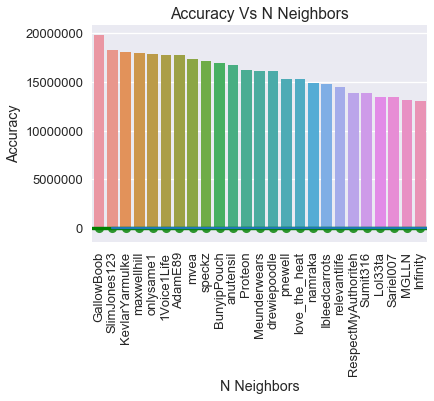

In [64]:
yknn = reddit_model["SuccessfulPost"]
Xknn_numcols = ['BestRank', 'MaxComments', 'MaxUpvotes', 'SubredditSubs', 'User_CommentKarma', 'User_PostKarma','MaxTimeOnReddit']
Xknn = reddit_model[Xknn_numcols]

Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(Xknn, yknn, random_state=99)

value_k = []
value_accuracy = []

def check_accuracy(knn):
    knn.fit(Xknn_train, yknn_train)
    yknn_pred_class = knn.predict(Xknn_test)
    return (metrics.accuracy_score(yknn_test, yknn_pred_class))

#Choosing N-Accuracy

for i in range(1,500, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    accuracy = check_accuracy(knn)
    #print("The KNN accuracy for N = " + str(i) + " is " + str(accuracy))
    value_k.append(i)
    value_accuracy.append(accuracy)


plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.plot(value_k, value_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('N Neighbors')
plt.title("Accuracy Vs N Neighbors")
plt.show()

### LET US BUILD AN MLR HERE JUST TO SEE HOW ACCURATE WE ARE WITH OUR STATS. HERE WE WILL PREDICT THE # OF COMMENTS A POST GETS. WE ARE NOT TOUCHING THE CLASSIFICATION VARIABLE FOR NOW. THIS IS JUST FOR PRACTICE

Score: 0.16765748297


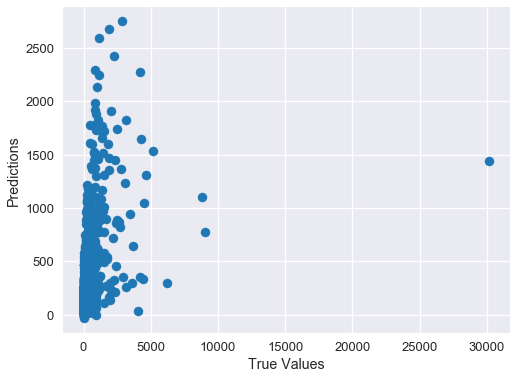

In [65]:
ymlr = reddit_model["MaxComments"]
Xmlr_numcols = ['MaxUpvotes', 'SubredditSubs', 'User_CommentKarma','MaxTimeOnReddit']
Xmlr = reddit_model[Xmlr_numcols]

Xmlr_train, Xmlr_test, ymlr_train, ymlr_test = train_test_split(Xmlr, ymlr, random_state=99)

mlrmodel = linear_model.LinearRegression()

model = mlrmodel.fit(Xmlr_train, ymlr_train)
predictions = mlrmodel.predict(Xmlr_test)

mlrmodel
model.coef_

plt.scatter(ymlr_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print("Score:", model.score(Xmlr_test, ymlr_test))
plt.show()

### CREATE A LOGISTIC REGRESSION MODEL HERE. USING SUBREDDIT SUBSCRIBERS, USER_COMMENTKARMA, USER_POSTKARMA & MINUTESSINCEPOSTED

In [66]:
import statsmodels.api as sm

ylog = reddit_model["SuccessfulPost"] #OUTPUT IS 0|1, LOGISTIC REGRESSION TYPE
Xlog_cols = ['SubredditSubs', 'User_CommentKarma', 'User_PostKarma','MaxTimeOnReddit', "LenTitle"]
Xlog = reddit_model[Xlog_cols]

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, random_state=99)

glm_logit = sm.GLM(ylog_train, 
                   Xlog_train,
                   sm.families.Binomial(sm.families.links.logit)).fit() ## Errors are binomially distributed.

predictions = glm_logit.predict(Xlog_test)
predictions

glm_logit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         SuccessfulPost   No. Observations:                 6909
Model:                            GLM   Df Residuals:                     6904
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4441.4
Date:                Fri, 03 Nov 2017   Deviance:                       8882.8
Time:                        08:09:44   Pearson chi2:                 6.86e+03
No. Iterations:                     4                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
SubredditSubs      6.171e-08   4.59e-09     13.458      0.000    5.27e-08    7.07e-08
User_CommentKarma -8.034e-08   2.54e-07     -0.316      0.752   -5.78e-07    4.17e-07
User_PostKarma     8.127e-09   2.33e-08      0.349      0.727   -3.75e-08    5.38e-08
MaxTimeOnReddit       0.0010   5.57e-05     17.441      0.000       0.001       0.001
LenTitle             -0.0395      0.003    -13.801      0.000      -0.045      -0.034
=====================================================================================
"""

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

logit = LogisticRegression()
model = logit.fit(Xlog_train, ylog_train)
prediction = model.predict(Xlog_test)


predict_prob = model.predict_proba(Xlog_test)
predict_prob


eval_sklearn_model(ylog_test, prediction)

True Negative:  1 | False Positive:  1152
False Negative:  1 | True Positive:  1150 

Sensitivity (TP/ TP + FN):  0.999131190269
Specificity (TN/ TN + FP):  0.000867302688638 

Accuracy:  0.499565972222
Precision:  0.499565595135




#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [68]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

y_strat = reddit_model["SuccessfulPost"]


cv = StratifiedKFold(y_strat, n_folds=3, shuffle=True, random_state=99)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
yrandsub = reddit_model["SuccessfulPost"]
Xrandsub = pd.get_dummies(reddit_model["Subreddit"])

print(Xrandsub.shape, yrandsub.shape)


(9213, 1532) (9213,)


In [70]:
%%time

dt = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(dt, Xrandsub, yrandsub, cv=5, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

Random Forest with Balanced Classes Score:	0.684 ± 0.009
CPU times: user 275 ms, sys: 62.6 ms, total: 338 ms
Wall time: 23.3 s


### TRY POST TYPE (IMAGE/SELF/ARTICLE) HERE

In [71]:
%%time
yrandsubpost = reddit_model["SuccessfulPost"]
Xrandsubpost = pd.get_dummies(reddit_model[["Subreddit", "Post_Type", "Username"]])
# Xrandsubpost = Xrandsubpost.join(reddit_model[['SubredditSubs', 'User_PostKarma', "LenTitle"]])


dt = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(dt, Xrandsubpost, yrandsubpost, cv=5, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))


Random Forest with Balanced Classes Score:	0.645 ± 0.018
CPU times: user 1.41 s, sys: 242 ms, total: 1.65 s
Wall time: 24.5 s


### CountVectorizer startification

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


#instantiate our model
cvec = CountVectorizer(stop_words='english', max_features=500)

#fit the count vectorizer to the data. This 'teaches' the count vectorizer the dictionary.
def fix_title(x):
    x = x.lower()
    x = re.sub("[^a-zA-Z]"," ", x) ###REMOVE PUNCTUATION
    x = lemmatizer.lemmatize(x)
    return x

text = reddit_model["Title"].apply(fix_title)

cvec.fit(text)

cvecdata= cvec.transform(text)

cvecdata

vectorized = pd.DataFrame(cvecdata.todense(),
             columns=cvec.get_feature_names())

sum_vectorized = vectorized.sum(axis=0)

sum_vectorized

frequent_list = pd.DataFrame({"Words":cvec.get_feature_names(), "Frequency": sum_vectorized})

frequent_list = frequent_list.reset_index()

frequent_list = frequent_list.drop("index", 1)

frequent_list.shape

(500, 2)

In [76]:
sum_vectorized

according      17
actually       27
ago            57
air            27
ama            25
amazing        21
america        17
american       22
anime          24
anon           27
apple          16
appreciate     17
art            37
ask            17
asked          17
astros         34
attack         27
attention      16
away           34
baby           60
bad            36
ball           23
ban            16
battle         16
beach          16
beat           22
beautiful      32
beer           18
believe        18
best          113
             ... 
want           64
wanted         36
wants          29
war            30
wars           21
wasn           17
watch          33
water          30
way            67
wcgw           17
week           65
weekend        19
weeks          19
went           60
white          46
wife           50
win            47
winter         16
woman          36
women          29
won            44
work           69
working        23
world         126
worth     

In [77]:
text

0                            jessica rabbit  trail mix up
1        r all has not seen robert mueller in over a m...
2                   iphone x screen repair will cost     
3                                                    lmao
4       i think my dog wants to be a mob boss for hall...
5          the coffee maker at my office was out of order
6                    lady at yellowstone took our picture
7            postgame thread  iowa state defeats tcu     
8       the curse of the black pearl still holds up   ...
9                              she knows shes a good girl
10      a guy walks into a restaurant with a full grow...
11       postgame thread  ohio state defeats penn stat...
12        my dad and i         i m the one on the right  
13      new york police officers  charged with raping ...
14                                    kid staples his ear
15      requires   aaa batteries  in the most annoying...
16                               a waterfall vs highwinds
17      paint 

In [78]:
vectorized

,according,actually,ago,air,ama,amazing,america,american,anime,anon,...,won,work,working,world,worth,wrong,xbox,year,years,yesterday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
frequent_list.sort_values("Frequency", ascending = False)

,Frequency,Words
174,390,halloween
218,246,just
285,207,new
231,193,like
497,190,year
79,185,costume
439,175,time
146,156,game
108,144,don
309,135,people


In [80]:
frequent_list[(frequent_list["Words"]=="game")]

,Frequency,Words
146,156,game


### THE MODEL BELOW LOOKS SURPRISINGLY GOOD. LET US TRY TEST/TRAIN ON IT.

In [81]:
vectorized.index = Xrandsubpost.index

yrandsubpost = reddit_model["SuccessfulPost"]
Xrandsubpost = pd.get_dummies(reddit_model[["Subreddit", "Post_Type", "Username"]])
Xrandsubpost = Xrandsubpost.join(vectorized)

dt = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(dt, Xrandsubpost, yrandsubpost, cv=3, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

Random Forest with Balanced Classes Score:	0.629 ± 0.016


In [82]:
yrandsubpost = reddit_model["SuccessfulPost"]
Xrandsubpost = pd.get_dummies(reddit_model[["Subreddit", "Post_Type", "User Profile", "Username"]])
Xrandsubpost = Xrandsubpost.join(reddit_model[['SubredditSubs', 'User_CommentKarma','MaxTimeOnReddit', "LenTitle", "User_PostKarma"]])
Xrandsubpost = Xrandsubpost.join(vectorized)



Xrandsubpost_train, Xrandsubpost_test, yrandsubpost_train, yrandsubpost_test = train_test_split(Xrandsubpost, yrandsubpost, random_state=99)
print(Xrandsubpost_train.shape, yrandsubpost_train.shape)
print(Xrandsubpost_test.shape, yrandsubpost_test.shape)

rfc_ = RandomForestClassifier(class_weight='balanced')
model = rfc_.fit(Xrandsubpost_train, yrandsubpost_train)

prediction = model.predict(Xrandsubpost_test)

predict_prob = rfc_.predict_proba(Xrandsubpost_test)


y_pred = prediction
x_test = Xrandsubpost_test
y_test = yrandsubpost_test
class_names = ['Sucessful', 'NotSuccessful']

eval_sklearn_model(y_test, prediction)

dt = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(dt, Xrandsubpost_train, yrandsubpost_train, cv=3, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))


(6909, 9839) (6909,)
(2304, 9839) (2304,)
True Negative:  930 | False Positive:  223
False Negative:  343 | True Positive:  808 

Sensitivity (TP/ TP + FN):  0.701998262381
Specificity (TN/ TN + FP):  0.806591500434 

Accuracy:  0.754340277778
Precision:  0.78370514064


Random Forest with Balanced Classes Score:	0.758 ± 0.006


In [83]:
frequent_list
frequent_list_sort = frequent_list.sort_values("Frequency", ascending=False)
frequent_list_sort

,Frequency,Words
174,390,halloween
218,246,just
285,207,new
231,193,like
497,190,year
79,185,costume
439,175,time
146,156,game
108,144,don
309,135,people


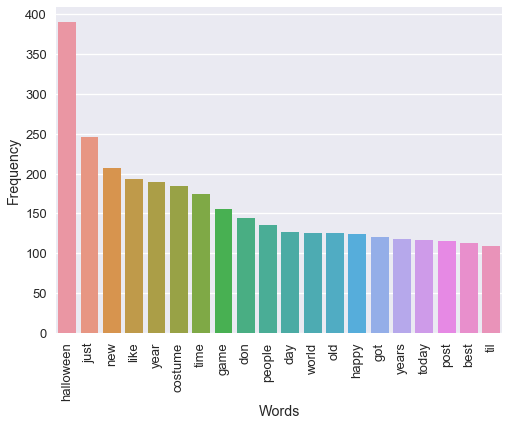

In [89]:
frequency_top100 = frequent_list_sort.iloc[:20]

sns.set_style("darkgrid")
sns.set_context("talk")
plt.xticks(rotation=90)

sns.barplot(x = "Words", y = "Frequency", data = frequency_top100, log = False)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [90]:
frequency_top100

,Frequency,Words
174,390,halloween
218,246,just
285,207,new
231,193,like
497,190,year
79,185,costume
439,175,time
146,156,game
108,144,don
309,135,people


In [91]:
reddit_all.head(3)

,Title,PostID,BestRank,MaxComments,MaxUpvotes,MaxTimeOnReddit,SuccessfulPost,Flair,SiteLink,Subreddit,SubredditSubs,SubmissionTime,Username,UserLink,User Profile,User_CommentKarma,User_PostKarma,Post_Type,LenTitle
0,"Jessica Rabbit, Trail Mix-Up",t3_79cj5h,1,1293,58000,1020,1,No Flair,i.imgur.com,r/pics,17767008,2017-10-28 20:53:59,DaphneDinah,https://www.reddit.com/user/DaphneDinah,Old,255,10163,Image/Gif,4
1,/r/all has not seen Robert Mueller in over a m...,t3_79cr91,2,1563,31500,1320,1,No Flair,i.imgur.com,r/The_Mueller,26501,2017-10-28 21:35:12,US_Senate_SgtAtArms,https://www.reddit.com/user/US_Senate_SgtAtArms,Old,88760,65631,Image/Gif,15
2,iPhone X screen repair will cost $279,t3_79ckp0,3,3249,26000,1020,1,Mobile phones,theverge.com,r/gadgets,12738923,2017-10-28 21:01:45,2martin4u,https://www.reddit.com/user/2martin4u,Old,8222,35301,Article/Other,7


In [92]:
text_one = " ".join(text)
text_one.count('wcgw')

17

In [93]:
cvecdatatest

<9213x500 sparse matrix of type '<class 'numpy.int64'>'
	with 17129 stored elements in Compressed Sparse Row format>

In [94]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


#instantiate our model
no_max = CountVectorizer(stop_words='english')

#fit the count vectorizer to the data. This 'teaches' the count vectorizer the dictionary.
def fix_title(x):
    x = x.lower()
    x = re.sub("[^a-zA-Z]"," ", x) ###REMOVE PUNCTUATION
    x = lemmatizer.lemmatize(x)
    return x

text_nomax = reddit_model["Title"].apply(fix_title)

no_max.fit(text_nomax)

cvecdatatest_nomax= no_max.transform(text_nomax)

cvecdatatest_nomax

vectorized_nomax = pd.DataFrame(cvecdatatest_nomax.todense(),
             columns=no_max.get_feature_names())

sum_vectorized_nomax = vectorized_nomax.sum(axis=0)

sum_vectorized_nomax

frequent_list_nomax = pd.DataFrame({"Words":no_max.get_feature_names(), "Frequency": sum_vectorized_nomax})

frequent_list_nomax = frequent_list_nomax.reset_index()

frequent_list_nomax = frequent_list_nomax.drop("index", 1)

frequent_list_nomax.shape

frequent_list_nomax.sort_values("Frequency", ascending = False)

,Frequency,Words
5640,390,halloween
6851,246,just
8603,207,new
7408,193,like
14390,190,year
2820,185,costume
13037,175,time
5113,156,game
3734,144,don
9366,135,people


In [95]:
frequent_list_sort_nomax = frequent_list_nomax.sort_values("Frequency", ascending=False)
frequent_list_sort_nomax

,Frequency,Words
5640,390,halloween
6851,246,just
8603,207,new
7408,193,like
14390,190,year
2820,185,costume
13037,175,time
5113,156,game
3734,144,don
9366,135,people


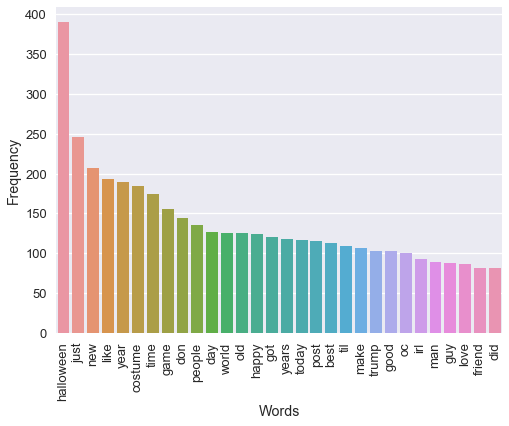

In [103]:
frequency_top100_nomax = frequent_list_sort_nomax.iloc[:30]

sns.set_style("darkgrid")
sns.set_context("talk")
plt.xticks(rotation=90)

sns.barplot(x = "Words", y = "Frequency", data = frequency_top100_nomax, log = False)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [97]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [98]:
## YOUR CODE HERE

#### Repeat the model-building process with a non-tree-based method.

In [99]:
## YOUR CODE HERE

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [100]:
## YOUR CODE HERE

# Executive Summary
---
Put your executive summary in a Markdown cell below.

### EXECUTIVE SUMMARY

The goal of this project was to scrape Reddit and analyze the data to increase the likelihood of a post getting successful. The threshold for a post being successful is if the number of comments a post received was above or below the median of the entire dataset. A successful post was denoted by a 1 and a post with comments less than the median received a 0
Reddit was scraped every 6 hours for 6 days straight. For this project, we scraped 250 pages at a time. The initial data set included 125k posts from over 1500 subreddits that hit the front page. A second scrape of usernames & their karma (# of likes they have received) and subreddits along with their subscribers was conducted. 
Since scraping was done multiple times a day, we had a number of duplicate posts. The dataset was cleaned and the post record with the highest number of upvotes, comments, duration was considered for analysis.
Since this is a classification model, we used several models to predict the success of a post. Each model had its own degree of success, and we were able to improve our predictability using more features, better models. Some of the features that were considered for our model were: Subreddits, Username, Subreddit Subscribers, Username Karma, Length of Title, Time since it was posted.  The following models were used and the performance was evaluated below:
1.	Logistic Regression – This model performed the worst. Logistic regression has its limitation with regards to accuracy and the best accuracy score we got was 0.5 (equivalent of a coin flip). This is not the best model to predict success of a post
2.	K-Nearest Neighbours – The KNN model examines the features of the nearest neighbours of a test point. However, it improved on our accuracy. By fitting KNN, the more neighbors we considered, the worse was the performance. Accuracy: 0.65
3.	Random Forest – This was the best model out of all the models tested. By analyzing subreddits and username, we were able to bump up the accuracy to 0.68. However, by analyzing and adding the frequency of words appearing in the post title, along with the length of the post, we were able to improve the accuracy of our model and predict with an accuracy of 0.75. 
4.	Analyzing the words in the title provided a lot of insights and improved the accuracy of our model. During the week of 10/29-11/3, the most common words were Halloween, costume, Trump and year. These coincide with Halloween this year, Donald Trump’s Russia revelations.

Using the information from this project, we have predicted with 0.75 accuracy the traits of a successful post. Key factors such as Words in Title, Subreddit Subscribers, User Post Karma, Length of Title and other factors helped in predicting and improving accuracy of the model
